# Distributions 
https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as sns                                  
import sys      
from distfit import distfit
import pandas as pd
plt.rcParams.update({'font.size': 18})

In [3]:
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [4]:
#make values consistent 
np.random.seed(12) 

## Find Distribution

In [5]:
def find_dis(dis):
    # Initialize distfit
    dist = distfit()
    # Determine best-fitting probability distribution for data
    dist.fit_transform(dis)
    dist.plot()

## Gaussian
68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations

In [6]:
def func_gaussian(x, N, mu, sigma) :
    return N * stats.norm.pdf(x, mu, sigma)

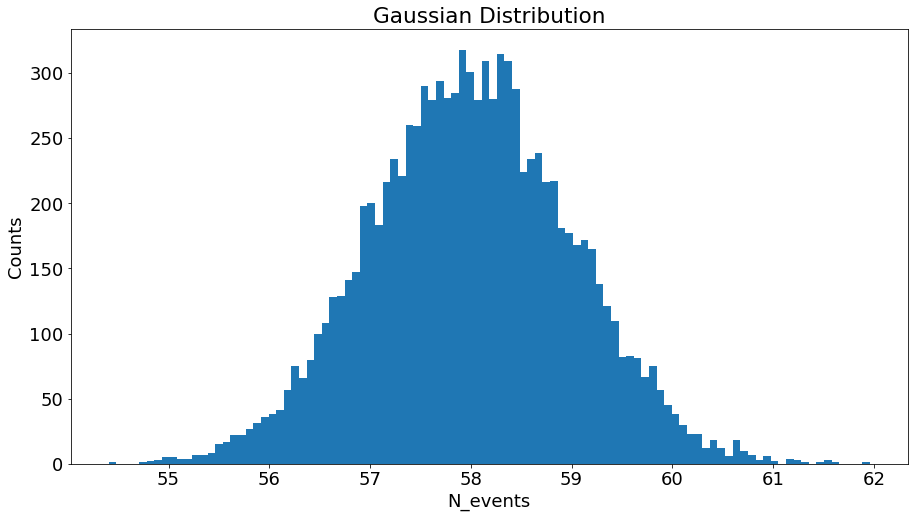

In [8]:
#random gaussina values 
mean = 58
std = 1
num = 10000     #amount of random numbers 
random_gaussian = stats.norm.rvs(loc=mean, scale=std,size=num)   #rule of thumb bins = sqrt(size)

#plot 

fig, ax = plt.subplots(figsize = (15,8))
ax.hist(random_gaussian,bins=int(np.sqrt(num)))
ax.set(xlabel = 'N_events', ylabel = 'Counts', title='Gaussian Distribution')
plt.show()


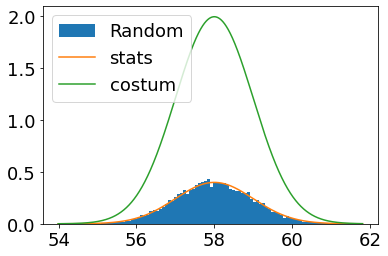

In [7]:
#probability density function 
#range
xmin = min(random_gaussian)
xmax=max(random_gaussian)
x=np.linspace(xmin,xmax,100000)

#pdf
prob_den = stats.norm.pdf(x, loc=58, scale=1)
prob_den2 = func_gaussian(x, 5, 58, 1)          #not normalized gaussian 
#plot
fig, ax = plt.subplots()
count, bins, ignored =  plt.hist(random_gaussian, int(np.sqrt(num)), density=True,label='Random')   #nprmalized randm numbers 
#plt.hist(random_gaussian/np.mean(random_gaussian),bins=int(np.sqrt(num)))
ax.plot(x, prob_den,label='stats')
ax.plot(x, prob_den2,label='costum')
plt.legend()
plt.show()

In [8]:
#probabilities 
prob = -1

#probability of x or lower
prob_under = stats.norm.cdf(x= prob,loc = 0, scale= 1)     

#probability of x or bigger
prob_over= 1 - stats.norm.cdf(x= 1,loc = 0,scale= 1) 

#probability betwwen 2 values in this case is obviously 68% as is the data 
between_prob = 1-(prob_under+prob_over)

print(prob_under, prob_over, between_prob)


0.15865525393145707 0.15865525393145707 0.6826894921370859


In [9]:
#standard deviations 
#inverse of cdf 
mean = 0
std = 1
stats.norm.ppf(q=0.025,loc=mean, scale=std) #2.5% of the data is .... std from the mean

-1.9599639845400545

## Binomial
The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment.

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   8  97  429  1180  2072  2410  2102  1158  446  89   9


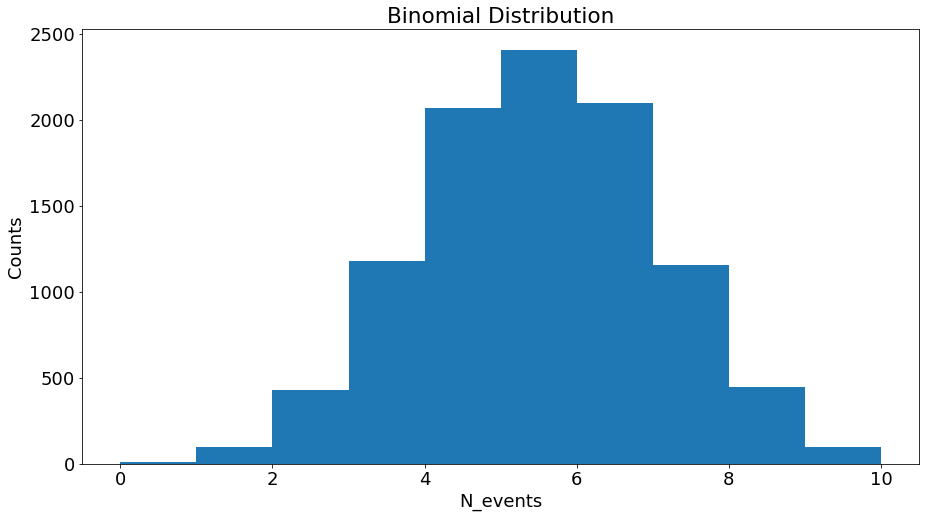

In [10]:
#random binomial example; fliping a coin 10 times how many heads after 10000 trials 
num_events_bin = 10     # Number of flips per trial
prob_bin = 0.5          # Success probability
trails_bin = 10000      # Number of trials


rand_binom = stats.binom.rvs(n=num_events_bin,p=prob_bin,size=trails_bin)  

print( pd.crosstab(index="counts", columns= rand_binom))

fig, ax = plt.subplots(figsize = (15,8))
ax.hist(rand_binom,bins=max(rand_binom))
ax.set(xlabel = 'N_events', ylabel = 'Counts', title='Binomial Distribution')
plt.show()

In [11]:
#probabilities 
#simulation 
prob_sim = len(rand_binom[rand_binom>=4])/trails_bin
#pmf
prob_list = []
for i in range (4,num_events_bin+1):
    succ = i #succeses
    prob1 = stats.binom.pmf(k=succ,n=10,p=prob_bin)  
    prob_list.append(prob1)
prob_pmf = np.sum(prob_list)
prob_sim,prob_pmf

(0.8286, 0.8281249999999998)

In [12]:
#weird answer... seams that is not simetric 
stats.binom.ppf(prob_pmf, num_events_bin, prob_bin, loc=0)

6.0

## The Geometric and Exponential Distributions

The geometric and exponential distributions model the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

### Geometric

col_0      1      2      3     4     5     6    7    8    9    10  11  12  13  \
row_0                                                                           
counts  49961  25084  12475  6267  3097  1533  815  374  208  100  43  22  12   

col_0   14  15  
row_0           
counts   4   5  


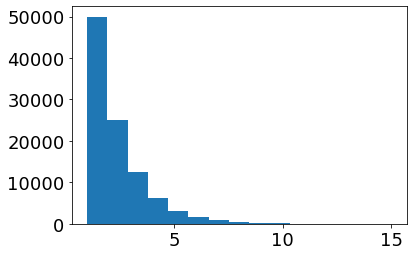

In [13]:
#random numbers example how many trials till you get a tail
trials_geom = 100000
prob_geom = 0.5
rand_geom = stats.geom.rvs(size=trials_geom,p=prob_geom)       

# Print table of counts
print( pd.crosstab(index="counts", columns= rand_geom))

plt.hist(rand_geom,bins=max(rand_geom))
plt.show()

In [14]:
#probabilities 5 or more 
#simulation 
prob_sim = len(rand_geom[rand_geom>=5])/trials_geom
#pmf
prob_list = []
for i in range (5,num_events_bin+1):
    succ = i #succeses
    prob1 = stats.geom.pmf(k=succ,p=prob_geom)  
    prob_list.append(prob1)
prob_pmf = np.sum(prob_list)
#cdf
prob_cdf = 1- stats.geom.cdf(4, prob_geom, loc=0)
prob_sim,prob_pmf, prob_cdf

(0.06213, 0.0615234375, 0.0625)

In [15]:
#probability that in 25 flips you get one head 
stats.geom.pmf(k=25,p=0.5)

2.9802322387695312e-08

### Exponential

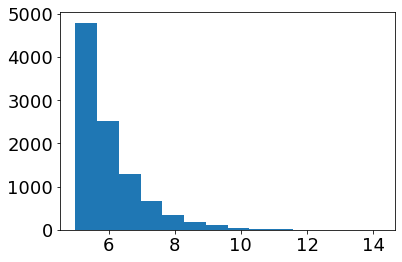

In [16]:

rand_expon = stats.expon.rvs(loc=5, scale=1, size=10000)


plt.hist(rand_expon,bins=abs(int(max(rand_expon))))
plt.show()

##### 

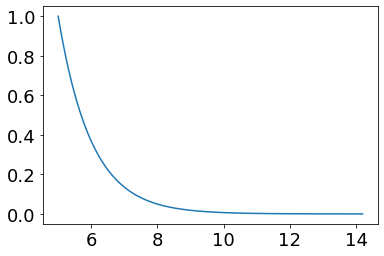

In [17]:
xmin = min(rand_expon)
xmax = max(rand_expon)
x = np.linspace(xmin,xmax, 1000)
expon_pdf = stats.expon.pdf(x, loc=5, scale=1)
plt.plot(x,expon_pdf)
plt.show()

In [18]:
#probabilities 
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=3,scale=1)  # Arrival rate
prob_1

0.950212931632136

## The Poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3702  3672  1860  576  156  27  7


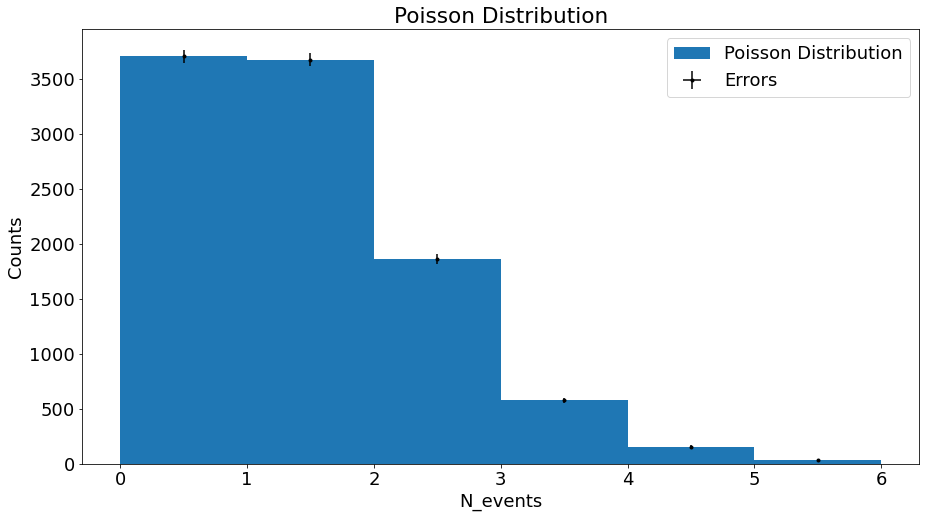

In [25]:
mu_poiss = 1    # Average arrival time 1
N_size = 100000
poiss_rand = stats.poisson.rvs(size=10000,mu = mu_poiss)       

# Print table of counts
print( pd.crosstab(index="counts", columns= poiss_rand))


#plot
counts, bin_edges = np.histogram(poiss_rand, bins=max(poiss_rand))#, range=(-0.5, N_bins+0.5))
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
s_counts = np.sqrt(counts)
x = bin_centers[counts>0]
y = counts[counts>0]
sy = s_counts[counts>0]

fig, ax = plt.subplots(figsize = (15,8))
ax.hist(poiss_rand,bins=max(poiss_rand),label='Poisson Distribution')
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Errors', fmt='.k',  ecolor='k', elinewidth=1.5, capthick=2)
ax.set(xlabel = 'N_events', ylabel = 'Counts', title='Poisson Distribution')
plt.legend()
plt.show()

In [20]:
#probabilities less or equal to 5 
poiss_cdf = 1-stats.poisson.cdf(k=5,mu=mu_poiss)  
poiss_rprob = len(poiss_rand[poiss_rand>=5])/N_size
poiss_cdf,poiss_rprob

(0.0005941848175816666, 0.00033)

In [21]:
#exactly 5
poiss_rprob = len(poiss_rand[poiss_rand==5])/N_size
poiss_pmf = stats.poisson.pmf(k=5,mu=mu_poiss) 
poiss_rprob, poiss_pmf

(0.00028, 0.00306566200976202)